In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image
import gc
plt.rcParams['figure.figsize'] = (14, 11)
plt.rcParams['font.size'] = 20

# 1.Black and white colors of pixels

In [2]:
def JuliaSetBlack(c, size, pixels, max_iterations):
    minRe, maxRe, minIm, maxIm = -size, size, -size, size
    pointsRe, pointsIm = pixels, pixels
    max_iterations = max_iterations
    infinity_border = (1 + np.sqrt(1 + 4 * abs(c))) / 2
    image = np.ones((pointsRe, pointsIm))

    for ip, Re in enumerate(np.linspace(minRe, maxRe, pointsRe)):
        for iq, Im in enumerate(np.linspace(minIm, maxIm, pointsIm)):
            z0 = complex(Re, Im)
            for k in range(max_iterations):
                z0 = z0 ** 2 + c
                if abs(z0) > infinity_border:
                    # set colour of pixel as white
                    image[ip, iq] = 0
                    break

    plt.title('С ='+ str(c))
    plt.ylabel('Im($z_{\infty}$)')
    plt.xlabel('Re($z_{\infty}$)')
    plt.imshow(np.rot90(image), cmap='Greys')
    plt.show()

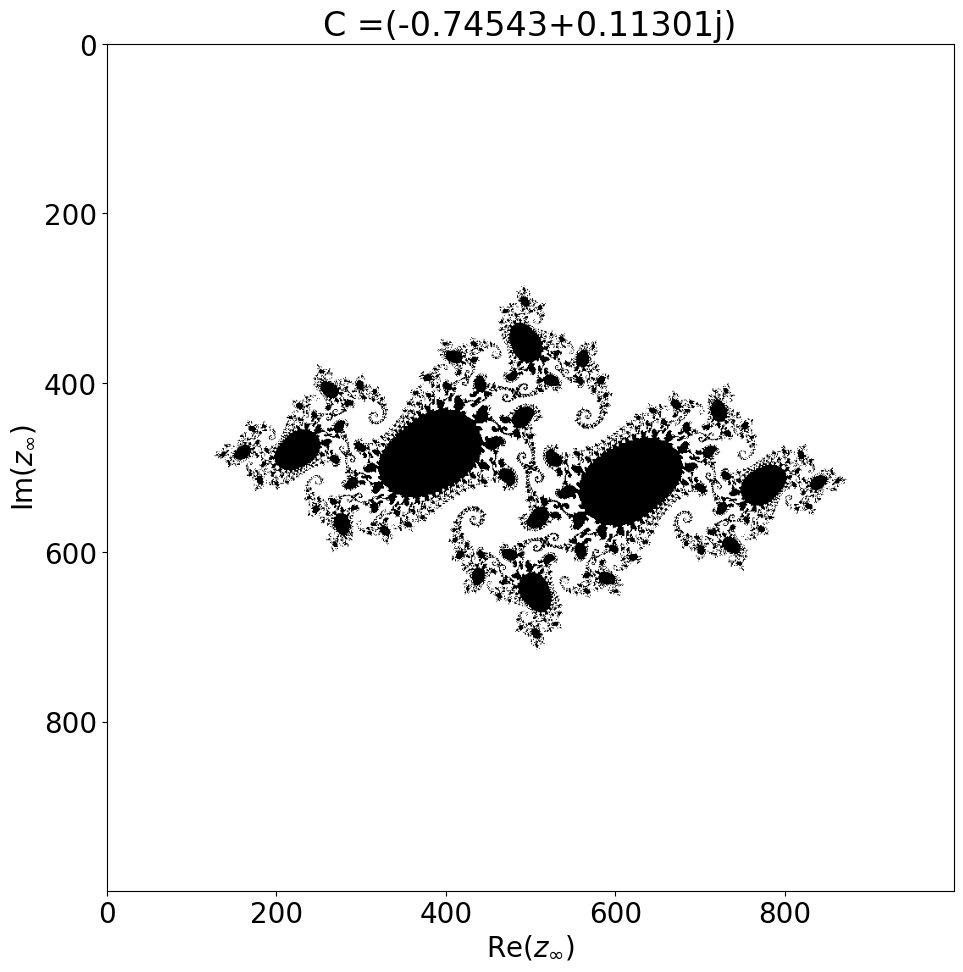

In [3]:
JuliaSetBlack(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 100)

# 2.Different colors for bifurcation points

In [ ]:
def JuliaSetColor(c, size, pixels, max_iterations, string='\infty', isMandelbrot = False):
    minRe, maxRe, minIm,maxIm = -size, size, -size, size
    pointsRe, pointsIm = pixels, pixels
    max_iterations = max_iterations
    infinity_border = (1 + np.sqrt(1 + 4 * abs(c))) / 2
    image = np.zeros((pointsRe, pointsIm)) # image with black colors

    for ip, Re in enumerate(np.linspace(minRe, maxRe, pointsRe)):
        for iq, Im in enumerate(np.linspace(minIm, maxIm, pointsIm)):
            if isMandelbrot:
                c = complex(Re, Im)
                z0 = 0
            else:
                z0 = complex(Re, Im)
            for k in range(max_iterations):
                z0 = z0 ** 2 + c
                if abs(z0) > infinity_border:
                    # set colour of pixel:
                    image[ip, iq] = max_iterations - k
                    break

    image = np.rot90(image)

    sns.heatmap(image, vmin=0, vmax=max_iterations, center= max_iterations/2, cmap= 'gnuplot2', cbar=False, square=True)
    if isMandelbrot:
        plt.title('Mandelbrot Set')
    else:
        plt.title('Julia Set given c = ' + str(c))
    plt.ylabel(f'Im($z_{string}$)')
    plt.xlabel(f'Re($z_{string}$)')
    plt.xticks(np.linspace(0, pixels-1, 5), np.round(np.linspace(-size, size, 5),2))
    plt.yticks(np.linspace(0, pixels-1, 5), -np.round(np.linspace(-size, size, 5),2))

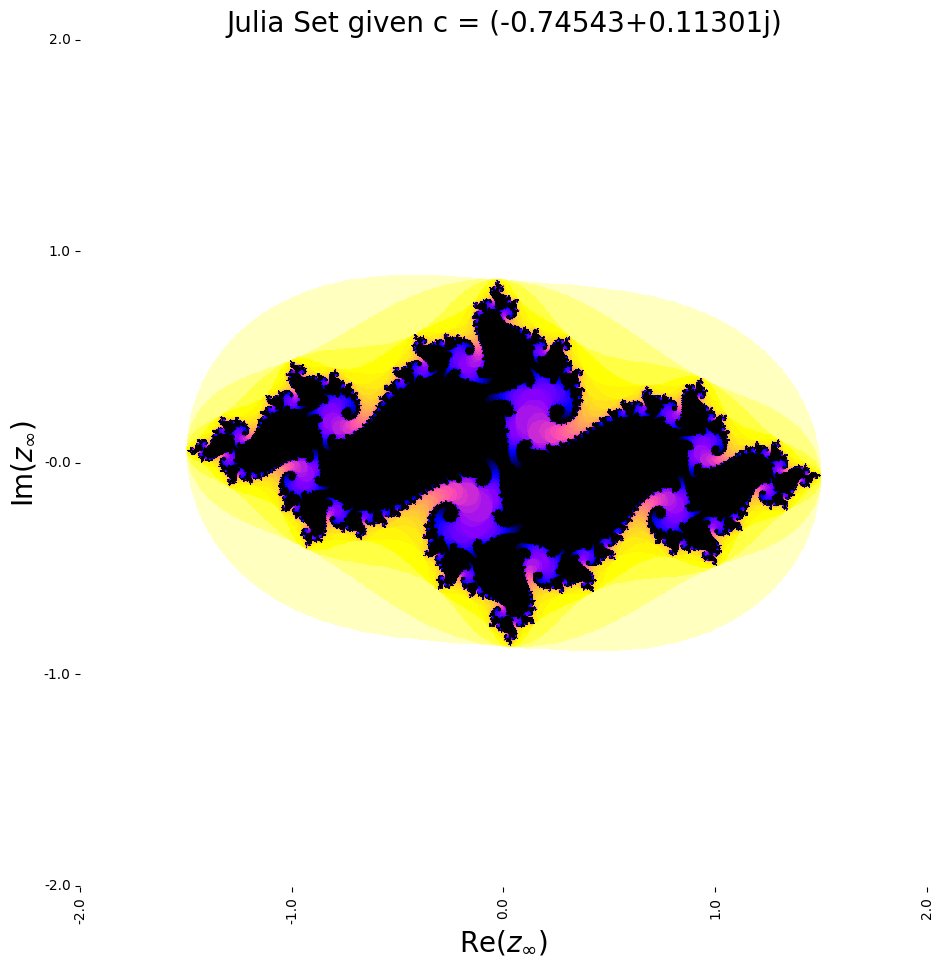

In [ ]:
JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50)

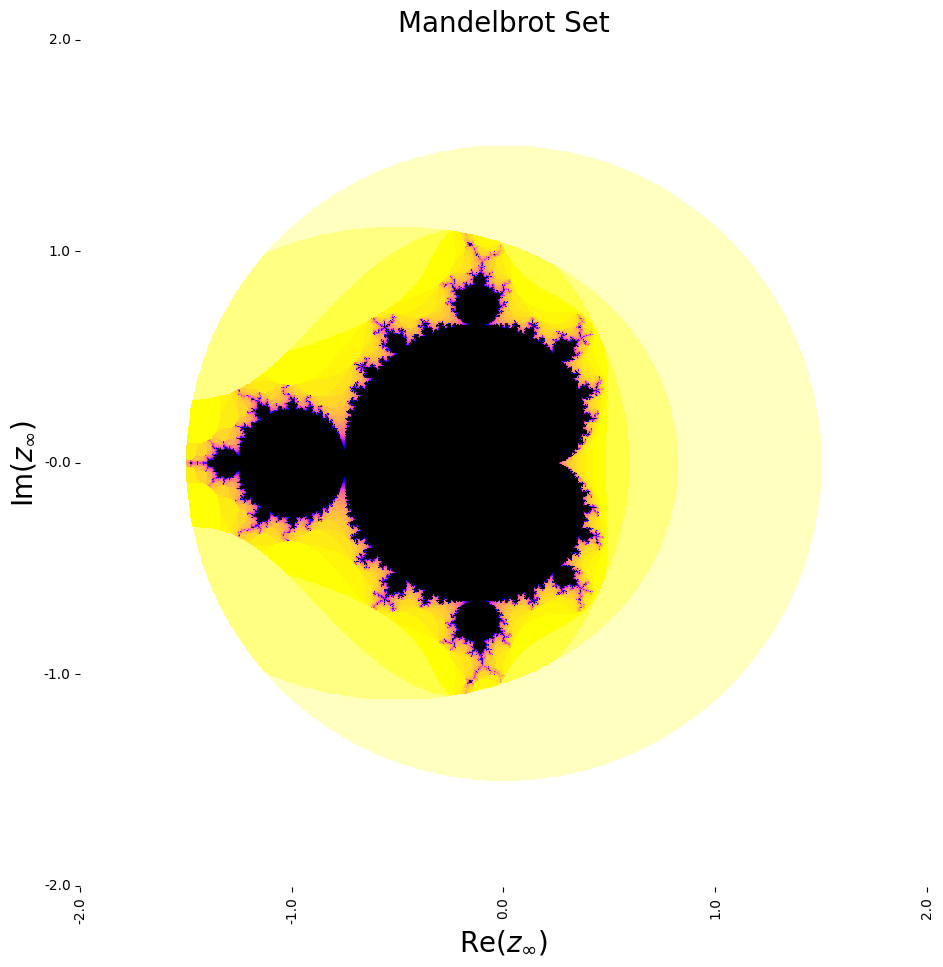

In [ ]:
JuliaSetColor(c = complex(-0.74543, 0.11301), size = 2, pixels = 1000, max_iterations = 50, isMandelbrot = True)

# 3.Generate figure of Julia set (c = 1-r) where r is the golden ratio. Label the axes (Re(z0), Im(z0)), fontsize should be 20, figsize = (14,11)

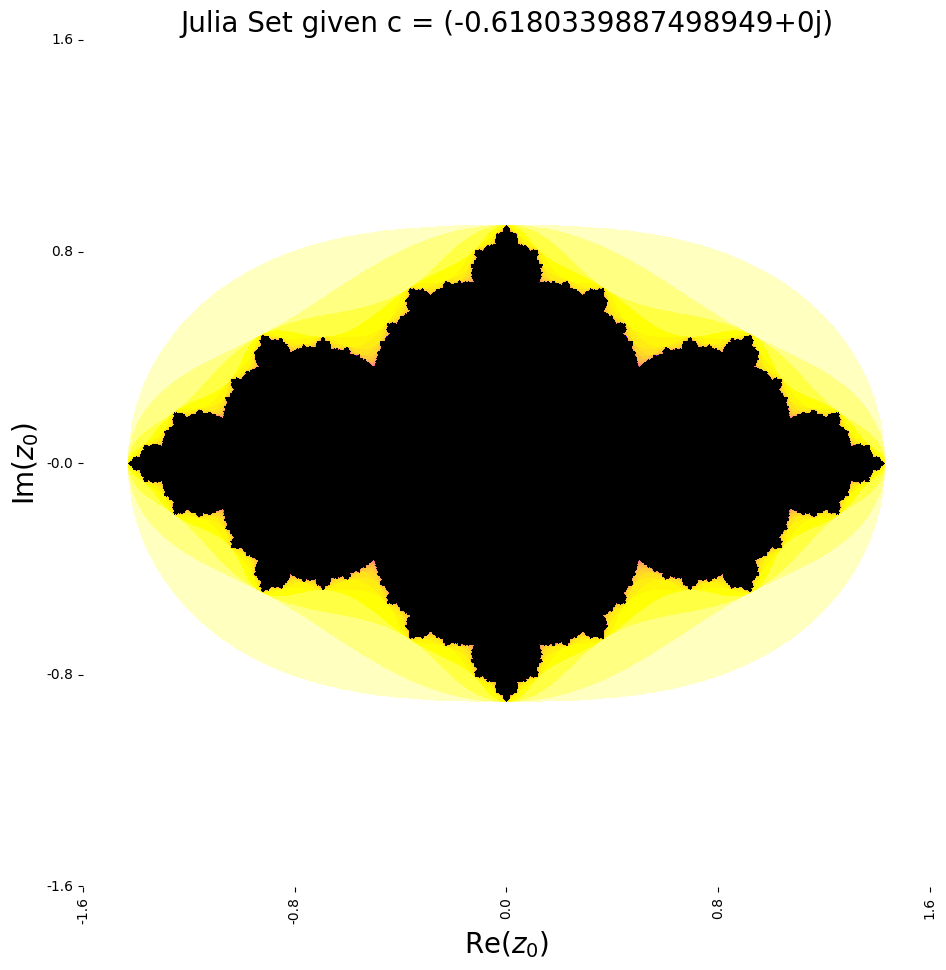

In [ ]:
r = (1 + 5 ** 0.5) / 2 # Golden ratio
JuliaSetColor(c = complex(1 - r, 0), size = 1.6, pixels = 2000, max_iterations = 50, string = '0')

# 4.Plot figures for c=exp(ia), a = range(0,2pi) & write down axes like in subtask 3, create animation of these figures slowly changing the a - value

In [ ]:
def JuliaSet(c, size, pixels, max_iterations, a_val):
    minRe, maxRe, minIm,maxIm = -size, size, -size, size
    pointsRe, pointsIm = pixels, pixels
    max_iterations = max_iterations
    infinity_border = (1 + np.sqrt(1 + 4 * abs(c))) / 2
    image = np.zeros((pointsRe, pointsIm))

    for ip, Re in enumerate(np.linspace(minRe, maxRe, pointsRe)):
        for iq, Im in enumerate(np.linspace(minIm, maxIm, pointsIm)):
            z0 = complex(Re, Im)
            for k in range(max_iterations):
                z0 = z0 ** 2 + c
                if abs(z0) > infinity_border:
                    image[ip, iq] = max_iterations - k
                    break

    image = np.rot90(image)

    sns.heatmap(image, vmin=0, vmax=max_iterations, center= max_iterations/2, cmap= 'gnuplot2', cbar=False, square=True)
    plt.title('С = $e^{i*' + str(np.round(a_val,3)) + '}$');
    plt.ylabel('Im($z_0$)')
    plt.xlabel('Re($z_0$)')
    plt.xticks(np.linspace(0, pixels-1, 5), np.round(np.linspace(-size, size, 5),2))
    plt.yticks(np.linspace(0, pixels-1, 5), -np.round(np.linspace(-size, size, 5),2))

In [ ]:
!mkdir JuliaImg

In [ ]:
nframes = 720
a = np.linspace(0, 2*np.pi-np.pi/nframes, nframes)

In [ ]:
for i in range(0,180,1):
    JuliaSet(c = complex(np.cos(a[i]), np.sin(a[i])), size = 1.6, pixels = 1000, max_iterations = 50, a_val = a[i])
    plt.savefig(f'JuliaImg/JuliaSet_{i:03d}.png')
    plt.close('all')
    gc.collect()

In [ ]:
for i in range(180,360,1):
    JuliaSet(c = complex(np.cos(a[i]), np.sin(a[i])), size = 1.6, pixels = 1000, max_iterations = 50, a_val = a[i])
    plt.savefig(f'JuliaImg/JuliaSet_{i:03d}.png')
    plt.close('all')
    gc.collect()

In [ ]:
for i in range(360,540,1):
    JuliaSet(c = complex(np.cos(a[i]), np.sin(a[i])), size = 1.6, pixels = 1000, max_iterations = 50, a_val = a[i])
    plt.savefig(f'JuliaImg/JuliaSet_{i:03d}.png')
    plt.close('all')
    gc.collect()

In [ ]:
for i in range(540,nframes,1):
    JuliaSet(c = complex(np.cos(a[i]), np.sin(a[i])), size = 1.6, pixels = 1000, max_iterations = 50, a_val = a[i])
    plt.savefig(f'JuliaImg/JuliaSet_{i:03d}.png')
    plt.close('all')
    gc.collect()

In [ ]:
images = []
all_files = []

i = glob.glob('JuliaImg/*')
i.sort()
all_files += i

img, *imgs = [Image.open(f) for f in all_files]
img.save(fp="JuliaSetAnimation.gif", format='GIF', append_images=imgs, save_all=True, duration=110, loop=0)